<a href="https://colab.research.google.com/github/careybaldwin02/Hack-H-er413-Workshop-2-17-24/blob/main/predicting_king_county_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting House Prices in King County with Linear Regression

## Problem Statement
---------------------------

The problem on hand is to predict the price of a home based on a collection of specific characteristics describing it. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices.

<img src="https://static.seattletimes.com/wp-content/uploads/2018/10/111313-780x502.jpg" title="source: imgur.com" />

----------------------------
## Data Information
---------------------------



Attribute Information (in order):


--------------------------------------------
- id
- date
- price
- bedrooms
- bathrooms
- sqft_living
- sqft_lot      
- floors         
- waterfront     
- view            
- condition       
- grade          
- sqft_above     
- sqft_basement   
- yr_built        
- yr_renovated    
- zipcode         
- lat            
- long           
- sqft_living15   
- sqft_lot15   




[Link to detailed variable definitions](https://github.com/shwetapai/Predicting-House-Prices-in-King-County)

### We will start be importing the necessary libraries

In [1]:
# import libraries for data manipulation
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# import libraries for model evaluation
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# import library for preparing data
from sklearn.model_selection import train_test_split

# import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### Problem 1: Read in the data

In [2]:
import requests
import pandas as pd
from io import StringIO

orig_url="https://drive.google.com/file/d/1-Ywo-pFM-O0oqItarUrIgC9qaMx62GO3/view?usp=drive_link"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df = pd.read_csv(csv_raw, sep=",")
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1001200035,20150306T000000,"$272,450.00",3,1.0,1350,7973,1.5,0,0,...,7,1350,0,1954,0,98188,47.4323,-122.292,1310,7491
1,1001200050,20140923T000000,"$259,000.00",4,1.5,1260,7248,1.5,0,0,...,7,1260,0,1955,0,98188,47.4330,-122.292,1300,7732
2,1003000175,20141222T000000,"$221,000.00",3,1.0,980,7606,1.0,0,0,...,7,980,0,1954,0,98188,47.4356,-122.290,980,8125
3,1003400155,20140811T000000,"$233,000.00",3,1.0,1100,7657,1.0,0,0,...,7,1100,0,1955,0,98188,47.4374,-122.285,1300,8000
4,1003400245,20141201T000000,"$179,950.00",3,1.0,1130,9907,1.0,0,0,...,7,1130,0,1954,0,98188,47.4362,-122.286,1320,9907


### Get some information about the dataset using the info() method

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  object 
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

* There are a total of 21613 non-null observations in each of the columns. This indicates that there are no missing values in the data.

* All columns in this dataset are numeric in nature except for the date and the price. The date can be dropped, but the price must be changed to a numerical value.

In [4]:
ex='$179,950.00'
float(ex[1:].replace(',',''))


179950.0

In [5]:
def to_num(x):
    val=float(x[1:].replace(',',''))
    return val

In [6]:
ex='$179,950.00'
to_num(ex)

179950.0

In [7]:
df['price']=df['price'].apply(to_num)

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1001200035,20150306T000000,272450.0,3,1.0,1350,7973,1.5,0,0,...,7,1350,0,1954,0,98188,47.4323,-122.292,1310,7491
1,1001200050,20140923T000000,259000.0,4,1.5,1260,7248,1.5,0,0,...,7,1260,0,1955,0,98188,47.4330,-122.292,1300,7732
2,1003000175,20141222T000000,221000.0,3,1.0,980,7606,1.0,0,0,...,7,980,0,1954,0,98188,47.4356,-122.290,980,8125
3,1003400155,20140811T000000,233000.0,3,1.0,1100,7657,1.0,0,0,...,7,1100,0,1955,0,98188,47.4374,-122.285,1300,8000
4,1003400245,20141201T000000,179950.0,3,1.0,1130,9907,1.0,0,0,...,7,1130,0,1954,0,98188,47.4362,-122.286,1320,9907


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Drop the date variable for now -- it will be problematic in numerical computations.

In [10]:
df=df.drop(['date','id', 'lat','long', 'zipcode'], axis=1) # axis=0 means drop a row, axis=1 means drop a column

---------------------------
## Let's now check the summary statistics of this dataset
---------------------------

### Write the code to find the summary statistics and write your observations based on that.

In [11]:
pd.set_option('display.float_format', str)
#write your code here
summary=df.describe().T
summary.round(2)

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.14,367127.2,75000.0,321950.0,450000.0,645000.0,7700000.0
bedrooms,21613.0,3.37,0.93,0.0,3.0,3.0,4.0,33.0
bathrooms,21613.0,2.11,0.77,0.0,1.75,2.25,2.5,8.0
sqft_living,21613.0,2079.9,918.44,290.0,1427.0,1910.0,2550.0,13540.0
sqft_lot,21613.0,15106.97,41420.51,520.0,5040.0,7618.0,10688.0,1651359.0
floors,21613.0,1.49,0.54,1.0,1.0,1.5,2.0,3.5
waterfront,21613.0,0.01,0.09,0.0,0.0,0.0,0.0,1.0
view,21613.0,0.23,0.77,0.0,0.0,0.0,0.0,4.0
condition,21613.0,3.41,0.65,1.0,3.0,3.0,4.0,5.0
grade,21613.0,7.66,1.18,1.0,7.0,7.0,8.0,13.0


### Observations

---------------------------
## Univariate Analysis
---------------------------

### Check the distribution of the variables

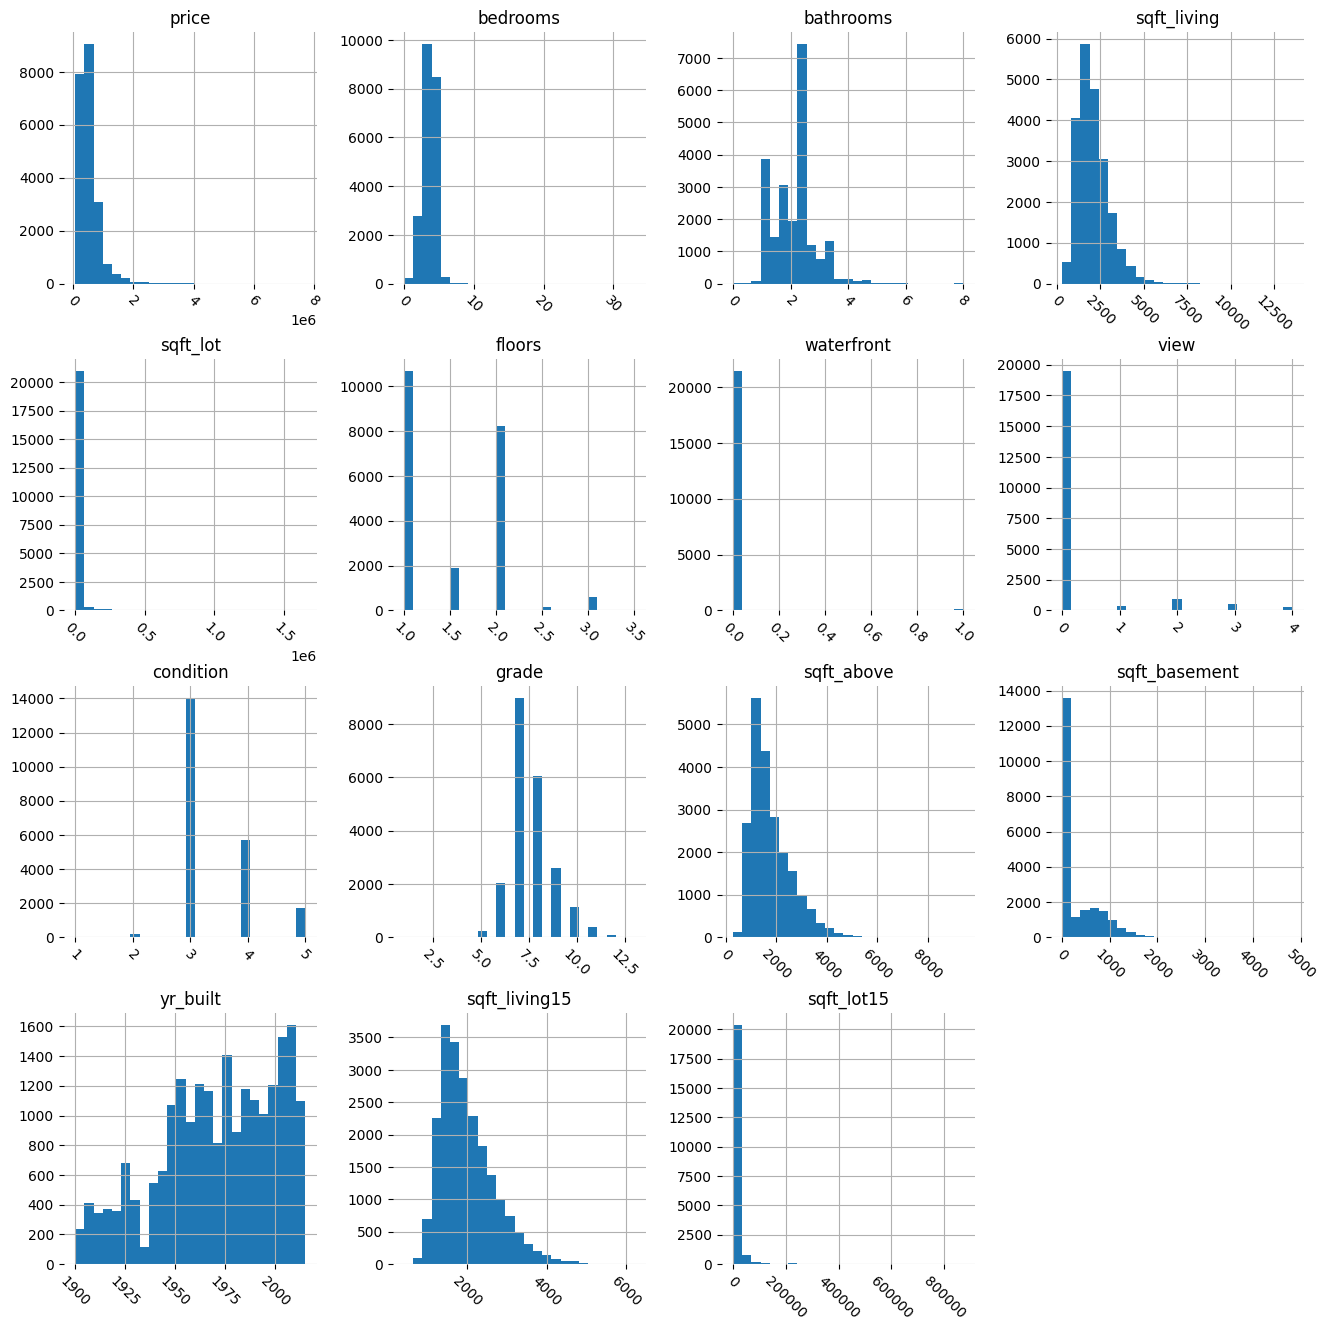

In [12]:
# let's plot all the columns to look at their distributions
df1=df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-45)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

### Observations

The target variable is slightly skewed. In such cases it is a good idead to apply a log transformation in order to avoid contradicting the assumption of linearity which is a necessary condition for applying a linear regression model.

In [13]:
df['price_log'] = np.log(df['price'])

<Axes: xlabel='price_log', ylabel='Count'>

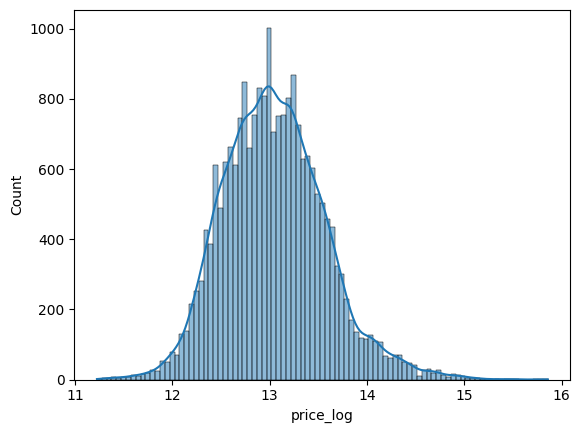

In [14]:
sns.histplot(data=df, x='price_log', kde = True)

### Observations
- The log-transformed variable (**price_log**) appears to have a **nearly normal distribution without skew**, and hence we can proceeed.



Another assumption that is necessary for using a linear regression model is that the independent variables are independent. If this condition is met, we can be relatively sure that the variable contribute unique information to the model. This can be checked by examining the relationships between the feature variables and examining the correlation matrix for multicollinearity.

---------------------------
## Bivariate Analysis
---------------------------


#### Let's check the correlation using the heatmap

- **Write the code to plot the correlation heatmap between the variables**
- **Write your observations**

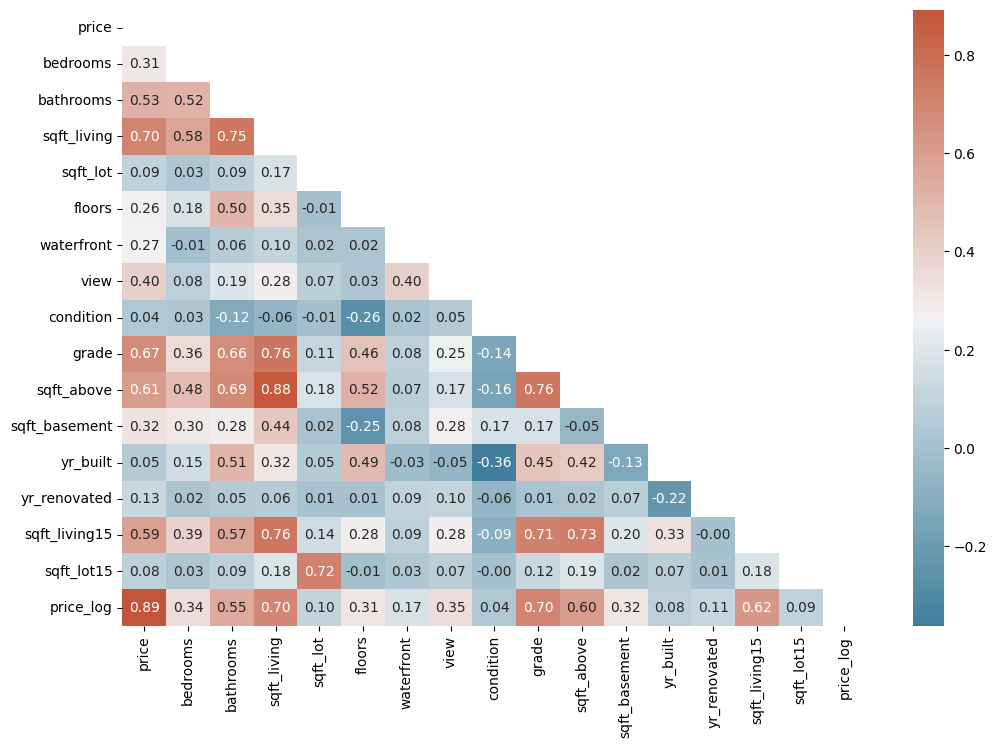

In [15]:
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df.corr())

# Create a visual view of the pairwise correlations
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap=cmap, mask=matrix)
plt.show()

**Observations:______**  
Positive correlations of note are observed between:

**sqft_living** and **bathrooms**   
**sqft_living** and **grade**   
**sqft_living** and **sqft_above**   
**sqft_living** and **sqft_living15**    
**sqft_lot** and **sqft_lot15**  
**sqft_above** and **sqft_lot15**   

Negative correlations of note are observed between:

None




- **Create a scatter plot to visualize the relationship between the features having significant correlations (>0.7)**

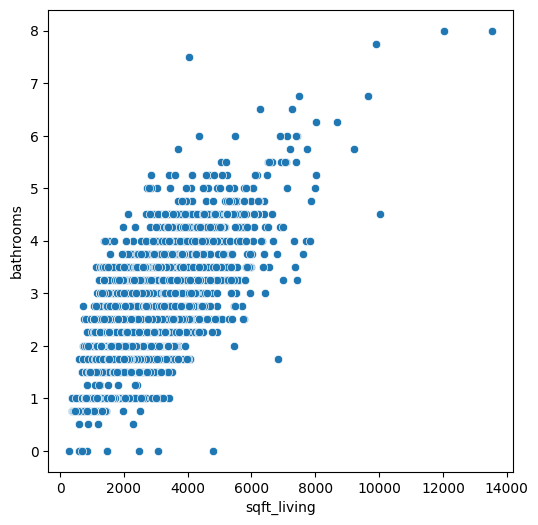

In [16]:
# scatterplot to visualize the relationship between sqft_living and bathrooms
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='sqft_living', y='bathrooms')
plt.show()

### Observations

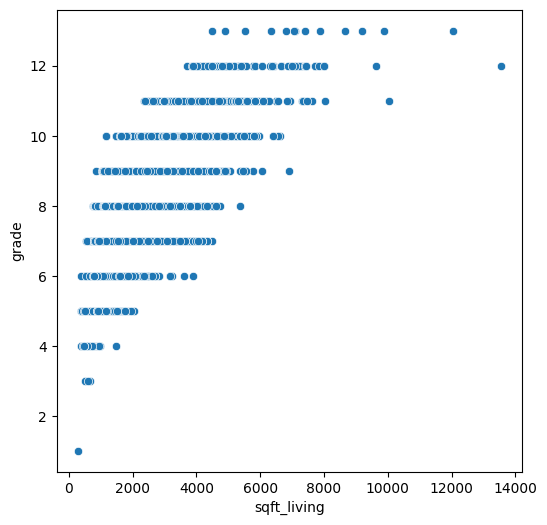

In [17]:
# scatterplot to visualize the relationship between sqft_living and grade
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='sqft_living', y='grade')
plt.show()

### Observations

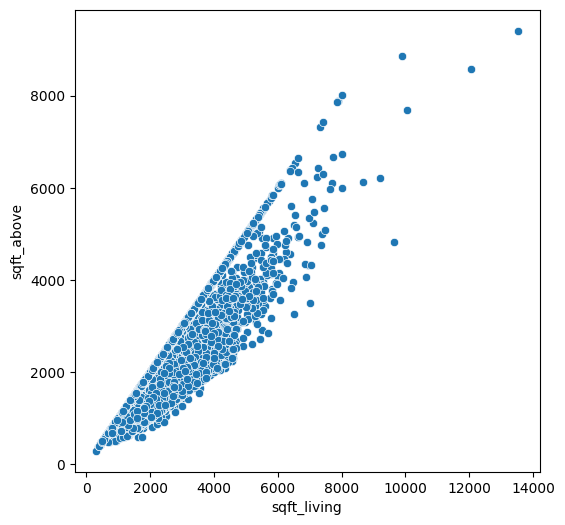

In [18]:
# scatterplot to visualize the relationship between sqft_living and sqft_above
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='sqft_living', y='sqft_above')
plt.show()

### Observations

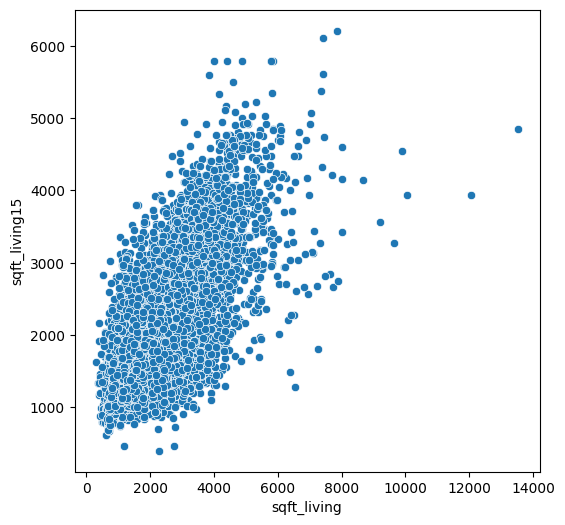

In [19]:
# scatterplot to visualize the relationship between sqft_living and sqft_living15
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='sqft_living', y='sqft_living15')
plt.show()

### Observations

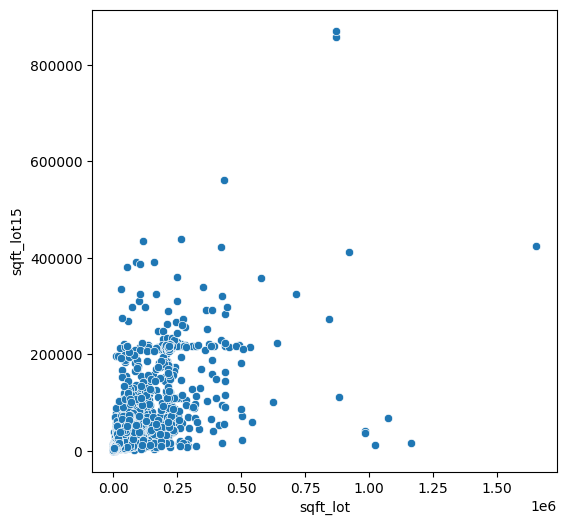

In [20]:
# scatterplot to visualize the relationship between sqft_living and bathrooms
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='sqft_lot', y='sqft_lot15')
plt.show()

The correlation is likely high due to outliers. We can remove these extreme values and check the correlation on the truncated data.

In [21]:
# remove the data corresponding to high sqft_lot
dft = df[df['sqft_lot'] < 125000]
dft=dft[dft['sqft_lot15']<600000]
# import the required function
from scipy.stats import pearsonr
# calculate the correlation
print('The correlation between sqft_lot and sqft_lot15 is', pearsonr(dft['sqft_lot'], dft['sqft_lot15'])[0])

The correlation between sqft_lot and sqft_lot15 is 0.7349498748682619


The correlation is still above 73, therefore we cannot conclude that the strong association is due to outliers alone.

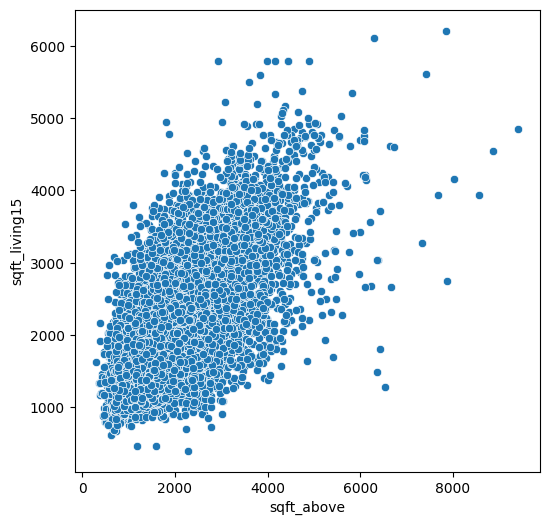

In [22]:
# scatterplot to visualize the relationship between sqft_above and sqft_living15
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='sqft_above', y='sqft_living15')
plt.show()

### Observations

There appear to be associations between some pairs of feature variables. This is not desiearable for linear regression.

---------------------------
## Partitioning the Data
---------------------------


Separate the target variable from the collection of feature variables.

In [23]:
# separate the dependent and indepedent variable
y = df['price_log']
X = df.drop(columns = {'price', 'price_log'})

# add the intercept term
X = sm.add_constant(X)

Split the data into a training and testing set

In [24]:
#splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

### Check for Multicollinearity

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped/treated till all the features have a VIF score < 5

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

          feature                VIF
0           const  8812.367922408697
1        bedrooms  1.610345310020216
2       bathrooms 3.2901108198774285
3     sqft_living                inf
4        sqft_lot  2.281233983901382
5          floors 1.9095757586910052
6      waterfront  1.212148458043198
7            view 1.4134429308980079
8       condition 1.2236814814920436
9           grade 3.2297650146870143
10     sqft_above                inf
11  sqft_basement                inf
12       yr_built 1.9949286921049025
13   yr_renovated  1.146469306806166
14  sqft_living15 2.8195303611775415
15     sqft_lot15 2.3121466441426946


* Drop variables with high VIF

**Drop the columnss labeled: 'sqft_living','sqft_above','sqft_basement' from the training data and check if multicollinearity is removed?**

In [26]:
# create the model after dropping TAX
X_train = X_train.drop(columns=['sqft_living','sqft_above','sqft_basement']) #Write your code here

# check for VIF
print(checking_vif(X_train))

          feature                VIF
0           const  8608.228098884676
1        bedrooms 1.4286784558193129
2       bathrooms 2.6517802232078838
3        sqft_lot  2.268332262412174
4          floors 1.5938629948657959
5      waterfront 1.2105559856660433
6            view 1.3651526951154522
7       condition  1.219816920459926
8           grade 2.7687003829451595
9        yr_built  1.928754925620461
10   yr_renovated 1.1463129274020374
11  sqft_living15 2.2693156583577285
12     sqft_lot15 2.3018812531811568


Now, we will create the linear regression model as the VIF is less than 5 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.

In [27]:
# create the model
model1 = sm.OLS(y_train,X_train).fit()
# get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     2276.
Date:                Sat, 17 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:32:35   Log-Likelihood:                -3979.7
No. Observations:               15129   AIC:                             7985.
Df Residuals:                   15116   BIC:                             8085.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.1458      0.238     93.229      0.000      21.680      22.611
bedrooms          0.0027      0.003      0.831      0.406      -0.004       0.009
bathrooms         0.1414      0.005     25.936      0.000       0.131       0.152
sqft_lot       2.227e-07   9.25e-08      2.408      0.016    4.14e-08    4.04e-07
floors            0.0865      0.006     14.484      0.000       0.075       0.098
waterfront        0.3603      0.032     11.347      0.000       0.298       0.423
view              0.0515      0.004     13.230      0.000       0.044       0.059
condition         0.0415      0.004      9.482      0.000       0.033       0.050
grade             0.2318      0.004     64.149      0.000       0.225       0.239
yr_built         -0.0060      0.000    -49.328      0.000      -0.006      -0.006
yr_renovated   6.332e-06   6.78e-06      0.934      0.351   -6.96e-06    1.96e-05
sqft_living15     0.0002   5.63e-06     26.842      0.000       0.000       0.000
sqft_lot15    -3.291e-07   1.38e-07     -2.379      0.017      -6e-07   -5.79e-08
==============================================================================
Omnibus:                       29.787   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.740
Skew:                          -0.070   Prob(JB):                     7.77e-08
Kurtosis:                       3.180   Cond. No.                     4.77e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# create the model
model2 = sm.OLS(y_test,X_test).fit()
# get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     861.0
Date:                Sat, 17 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:32:36   Log-Likelihood:                -1612.1
No. Observations:                6484   AIC:                             3254.
Df Residuals:                    6469   BIC:                             3356.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            21.2770      0.366     58.070      0.000      20.559      21.995
bedrooms         -0.0248      0.006     -4.442      0.000      -0.036      -0.014
bathrooms         0.0736      0.009      7.982      0.000       0.056       0.092
sqft_living    9.527e-05   6.38e-06     14.936      0.000    8.28e-05       0.000
sqft_lot       3.371e-07   1.25e-07      2.701      0.007    9.25e-08    5.82e-07
floors            0.1274      0.010     12.569      0.000       0.108       0.147
waterfront        0.3373      0.052      6.506      0.000       0.236       0.439
view              0.0350      0.006      5.869      0.000       0.023       0.047
condition         0.0542      0.006      8.403      0.000       0.042       0.067
grade             0.2102      0.006     35.197      0.000       0.198       0.222
sqft_above    -4.931e-07   6.24e-06     -0.079      0.937   -1.27e-05    1.17e-05
sqft_basement  9.576e-05   7.35e-06     13.025      0.000    8.13e-05       0.000
yr_built         -0.0054      0.000    -28.920      0.000      -0.006      -0.005
yr_renovated   3.684e-05   1.04e-05      3.540      0.000    1.64e-05    5.72e-05
sqft_living15     0.0001   9.46e-06     12.050      0.000    9.54e-05       0.000
sqft_lot15    -8.014e-07   2.02e-07     -3.965      0.000    -1.2e-06   -4.05e-07
==============================================================================
Omnibus:                       37.785   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.471
Skew:                          -0.131   Prob(JB):                     3.63e-10
Kurtosis:                       3.304   Cond. No.                     1.16e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.14e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Back-transforming coefficients from log scale
[See reference](https://library.virginia.edu/data/articles/interpreting-log-transformations-in-a-linear-model)

When the target variable is transormed to a log scale, the coefficients may be exponetiated to more interpretable values.

The results are then interpreted as the factor by which the target variable changes for each unit increase in the feature variable. Subtracting 1 from this value and multiplying by 100% yields the percent change in the target variable for each unit increase in the feature variable.

In [29]:
coef = model2.params #write your code here
out_p=pd.DataFrame((np.exp(coef)-1)*100, columns=['Coefficients'])
out_p

,Coefficients
const,173981918972.07654
bedrooms,-2.449759174130417
bathrooms,7.636870042101451
sqft_living,0.00952695648901436
sqft_lot,3.371249781558561e-05
floors,13.58756920874149
waterfront,40.11546825594243
view,3.562869219631848
condition,5.571334691408381
grade,23.38980695603585


### Sample Interpretations
`bathrooms	7.65` For each additional bathroom, the model predicts a 7.65% increase in the selling price of the home.

`Waterfront	40.75` The model predicts that waterfront homes have a 40.75% higher selling price than non-waterfront homes.

